# Análisis Estadístico de HHRR IBM
## Dataset Columns
- **Age**: Edad
- **DailyRate**: Tarifa Diaria
- **DistanceFromHome**: Distancia desde casa
- **Education**: Nivel de Educación
- **EnvironmentSatisfaction**: Satisfacción Laboral pero en el contexto del entorno físico
- **HourlyRate**: Tarifa por Hora
- **JobInvolvement**: Compromiso con el Trabajo
- **JobLevel**: Nivel de trabajo
- **JobSatisfaction**: Satisfacción de trabajo con su Rol Actual
- **MonthlyIncome**: Ingresos Mensuales
- **MonthlyRate**: Tarifa Mensual
- **NumCompaniesWorked**: Número de compañías en las cuales trabajó
- **PercentSalaryHike**: Porcentaje de incremento salarial
- **PerformanceRating**: Calificación de Desenvolvimiento
- **RelationshipSatisfaction**: Satisfacción interpersonal
- **StandardHours**: Horas Estándar
- **StockOptionLevel**: Tipos de opciones que un empleado tiene para adquirir acciones de la empresa
- **TotalWorkingYears**: Horas trabajadas por Año
- **TrainingTimesLastYear**: Entrenamientos recibidos el último año
- **WorkLifeBalance**: Balance laboral y personal
- **YearsAtCompany**: Años en la compañía
- **YearsInCurrentRole**: Años en el Rol Actúal
- **YearsSinceLastPromotion**: Años que han pasado desde el último ascenso.
- **YearsWithCurrManager**: Años con el manager actual

## Libs to use

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Quantitative Columns

In [30]:

df = pd.read_csv("caso_hr_analytics_ibm/WA_Fn-UseC_-HR-Employee-Attrition.csv")

# all int64 types
quantitative_columns = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate',
                        'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
                        'TotalWorkingYears', 'TrainingTimesLastYear',
                        'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
                        'YearsWithCurrManager'
                       ]
df[quantitative_columns].head()


Age  DailyRate  DistanceFromHome  HourlyRate  MonthlyIncome  MonthlyRate  \
0   41       1102                 1          94           5993        19479   
1   49        279                 8          61           5130        24907   
2   37       1373                 2          92           2090         2396   
3   33       1392                 3          56           2909        23159   
4   27        591                 2          40           3468        16632   

   NumCompaniesWorked  PercentSalaryHike  TotalWorkingYears  \
0                   8                 11                  8   
1                   1                 23                 10   
2                   6                 15                  7   
3                   1                 11                  8   
4                   9                 12                  6   

   TrainingTimesLastYear  YearsAtCompany  YearsInCurrentRole  \
0                      0               6                   4   
1                      3              10                   7   
2                      3               0                   0   
3                      3               8                   7   
4                      3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

## Cualitative Columns

In [25]:
qualitative_columns = [
    "Attrition", "BusinessTravel", "Department", "EducationField", "Gender", "JobRole",
    "MaritalStatus", "Over18", "OverTime", "Education", 'EnvironmentSatisfaction', 'JobInvolvement',
    'JobSatisfaction', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'PerformanceRating',
    'WorkLifeBalance'
]

# get info about information
df[qualitative_columns].head()

Attrition     BusinessTravel              Department EducationField  Gender  \
0       Yes      Travel_Rarely                   Sales  Life Sciences  Female   
1        No  Travel_Frequently  Research & Development  Life Sciences    Male   
2       Yes      Travel_Rarely  Research & Development          Other    Male   
3        No  Travel_Frequently  Research & Development  Life Sciences  Female   
4        No      Travel_Rarely  Research & Development        Medical    Male   

                 JobRole MaritalStatus Over18 OverTime  Education  \
0        Sales Executive        Single      Y      Yes          2   
1     Research Scientist       Married      Y       No          1   
2  Laboratory Technician        Single      Y      Yes          2   
3     Research Scientist       Married      Y      Yes          4   
4  Laboratory Technician       Married      Y       No          1   

   EnvironmentSatisfaction  JobInvolvement  JobSatisfaction  \
0                        2               3                4   
1                        3               2                2   
2                        4               2                3   
3                        4               3                3   
4                        1               3                2   

   RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                         1             80                 0   
1                         4             80                 1   
2                         2             80                 0   
3                         3             80                 0   
4                         4             80                 1   

   PerformanceRating  
0                  3  
1                  4  
2                  3  
3                  3  
4                  3

## Describiendo la Data de las Variables que necesitamos analizar
Por ejemplo qué es JobLevel ?

<Axes: >

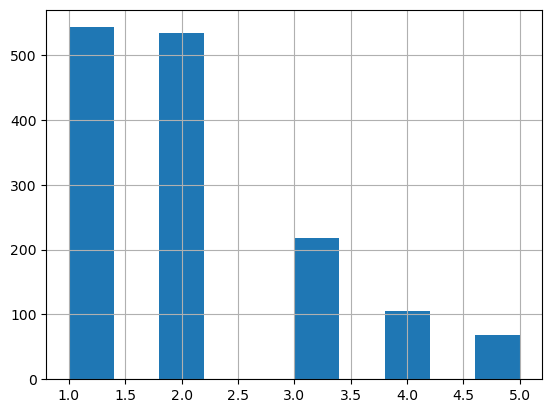

In [8]:
df['JobLevel'].hist(bins=10)

De acuerdo al análisis podríamos considerar mas que una variable cuantitativa, será una variable categórica, porque suponemos que podría indicar una variable categórica ordinal.

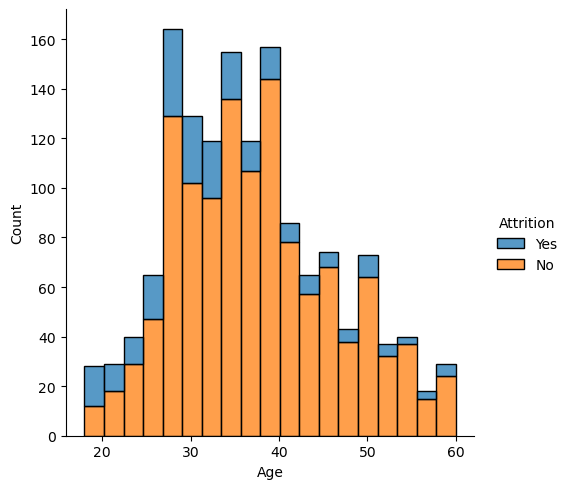

In [18]:
sns.displot(df, x='Age', hue='Attrition', multiple='stack')

Este gráfico describe que quienes se fueron de la empresa en un gran porcentaje tenían una edad en un rango de 25-40 años

## Attrition vs MonthlyIncome
Nos muestra que existe una dispersión de la información

<Axes: xlabel='Attrition', ylabel='TotalWorkingYears'>

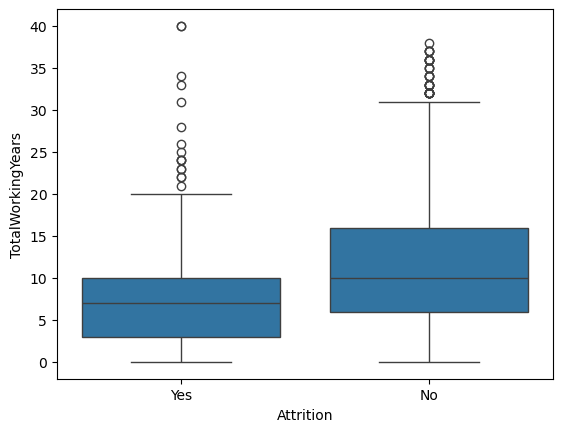

In [34]:
sns.boxplot(x='Attrition', y='TotalWorkingYears', data=df)

Esta gráfica nos muestra que los que se fueron de la empresa la mayor cantidad estaba entre 2 y 10 años de trabajo, se muestra una distribución normal

## Attrition vs RelationshipSatisfaction

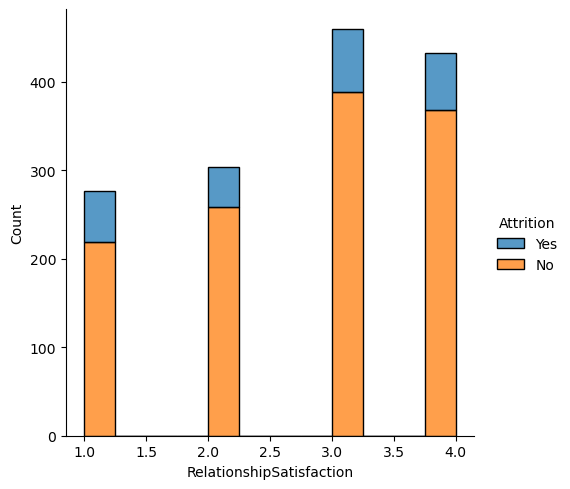

In [46]:
sns.displot(df, x='RelationshipSatisfaction', hue='Attrition', multiple='stack')

Podemos observar que no es un factor determinante el relacionarse con la empresa

<Axes: xlabel='Attrition', ylabel='EnvironmentSatisfaction'>

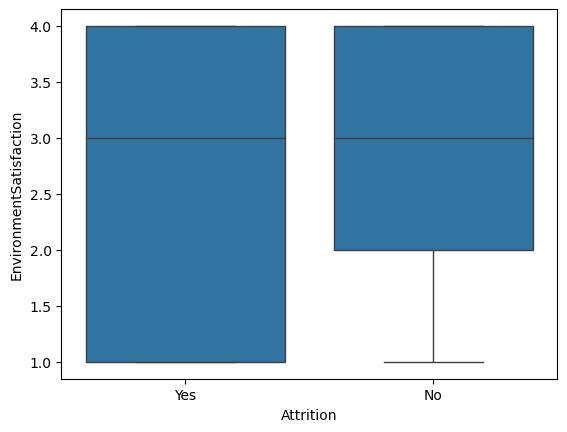

In [45]:
sns.boxplot(x='Attrition', y='EnvironmentSatisfaction', data=df)

Aquí observamos que los que se fueron no estaban a gusto con el lugar de trabajo, sus oficinas etc.

In [56]:
df_env_satisfaction = df[df['Attrition'] == 'No']['EnvironmentSatisfaction'].value_counts().reset_index().sort_values(by='EnvironmentSatisfaction')
df_env_satisfaction['Cumulative Frequency EnvironmentSatisfaction'] = df_env_satisfaction['count'].cumsum()
df_env_satisfaction

EnvironmentSatisfaction  count  \
3                        1    212   
2                        2    244   
0                        3    391   
1                        4    386   

   Cumulative Frequency EnvironmentSatisfaction  
3                                           212  
2                                           456  
0                                           847  
1                                          1233

## Viendo Todo en un diagrama

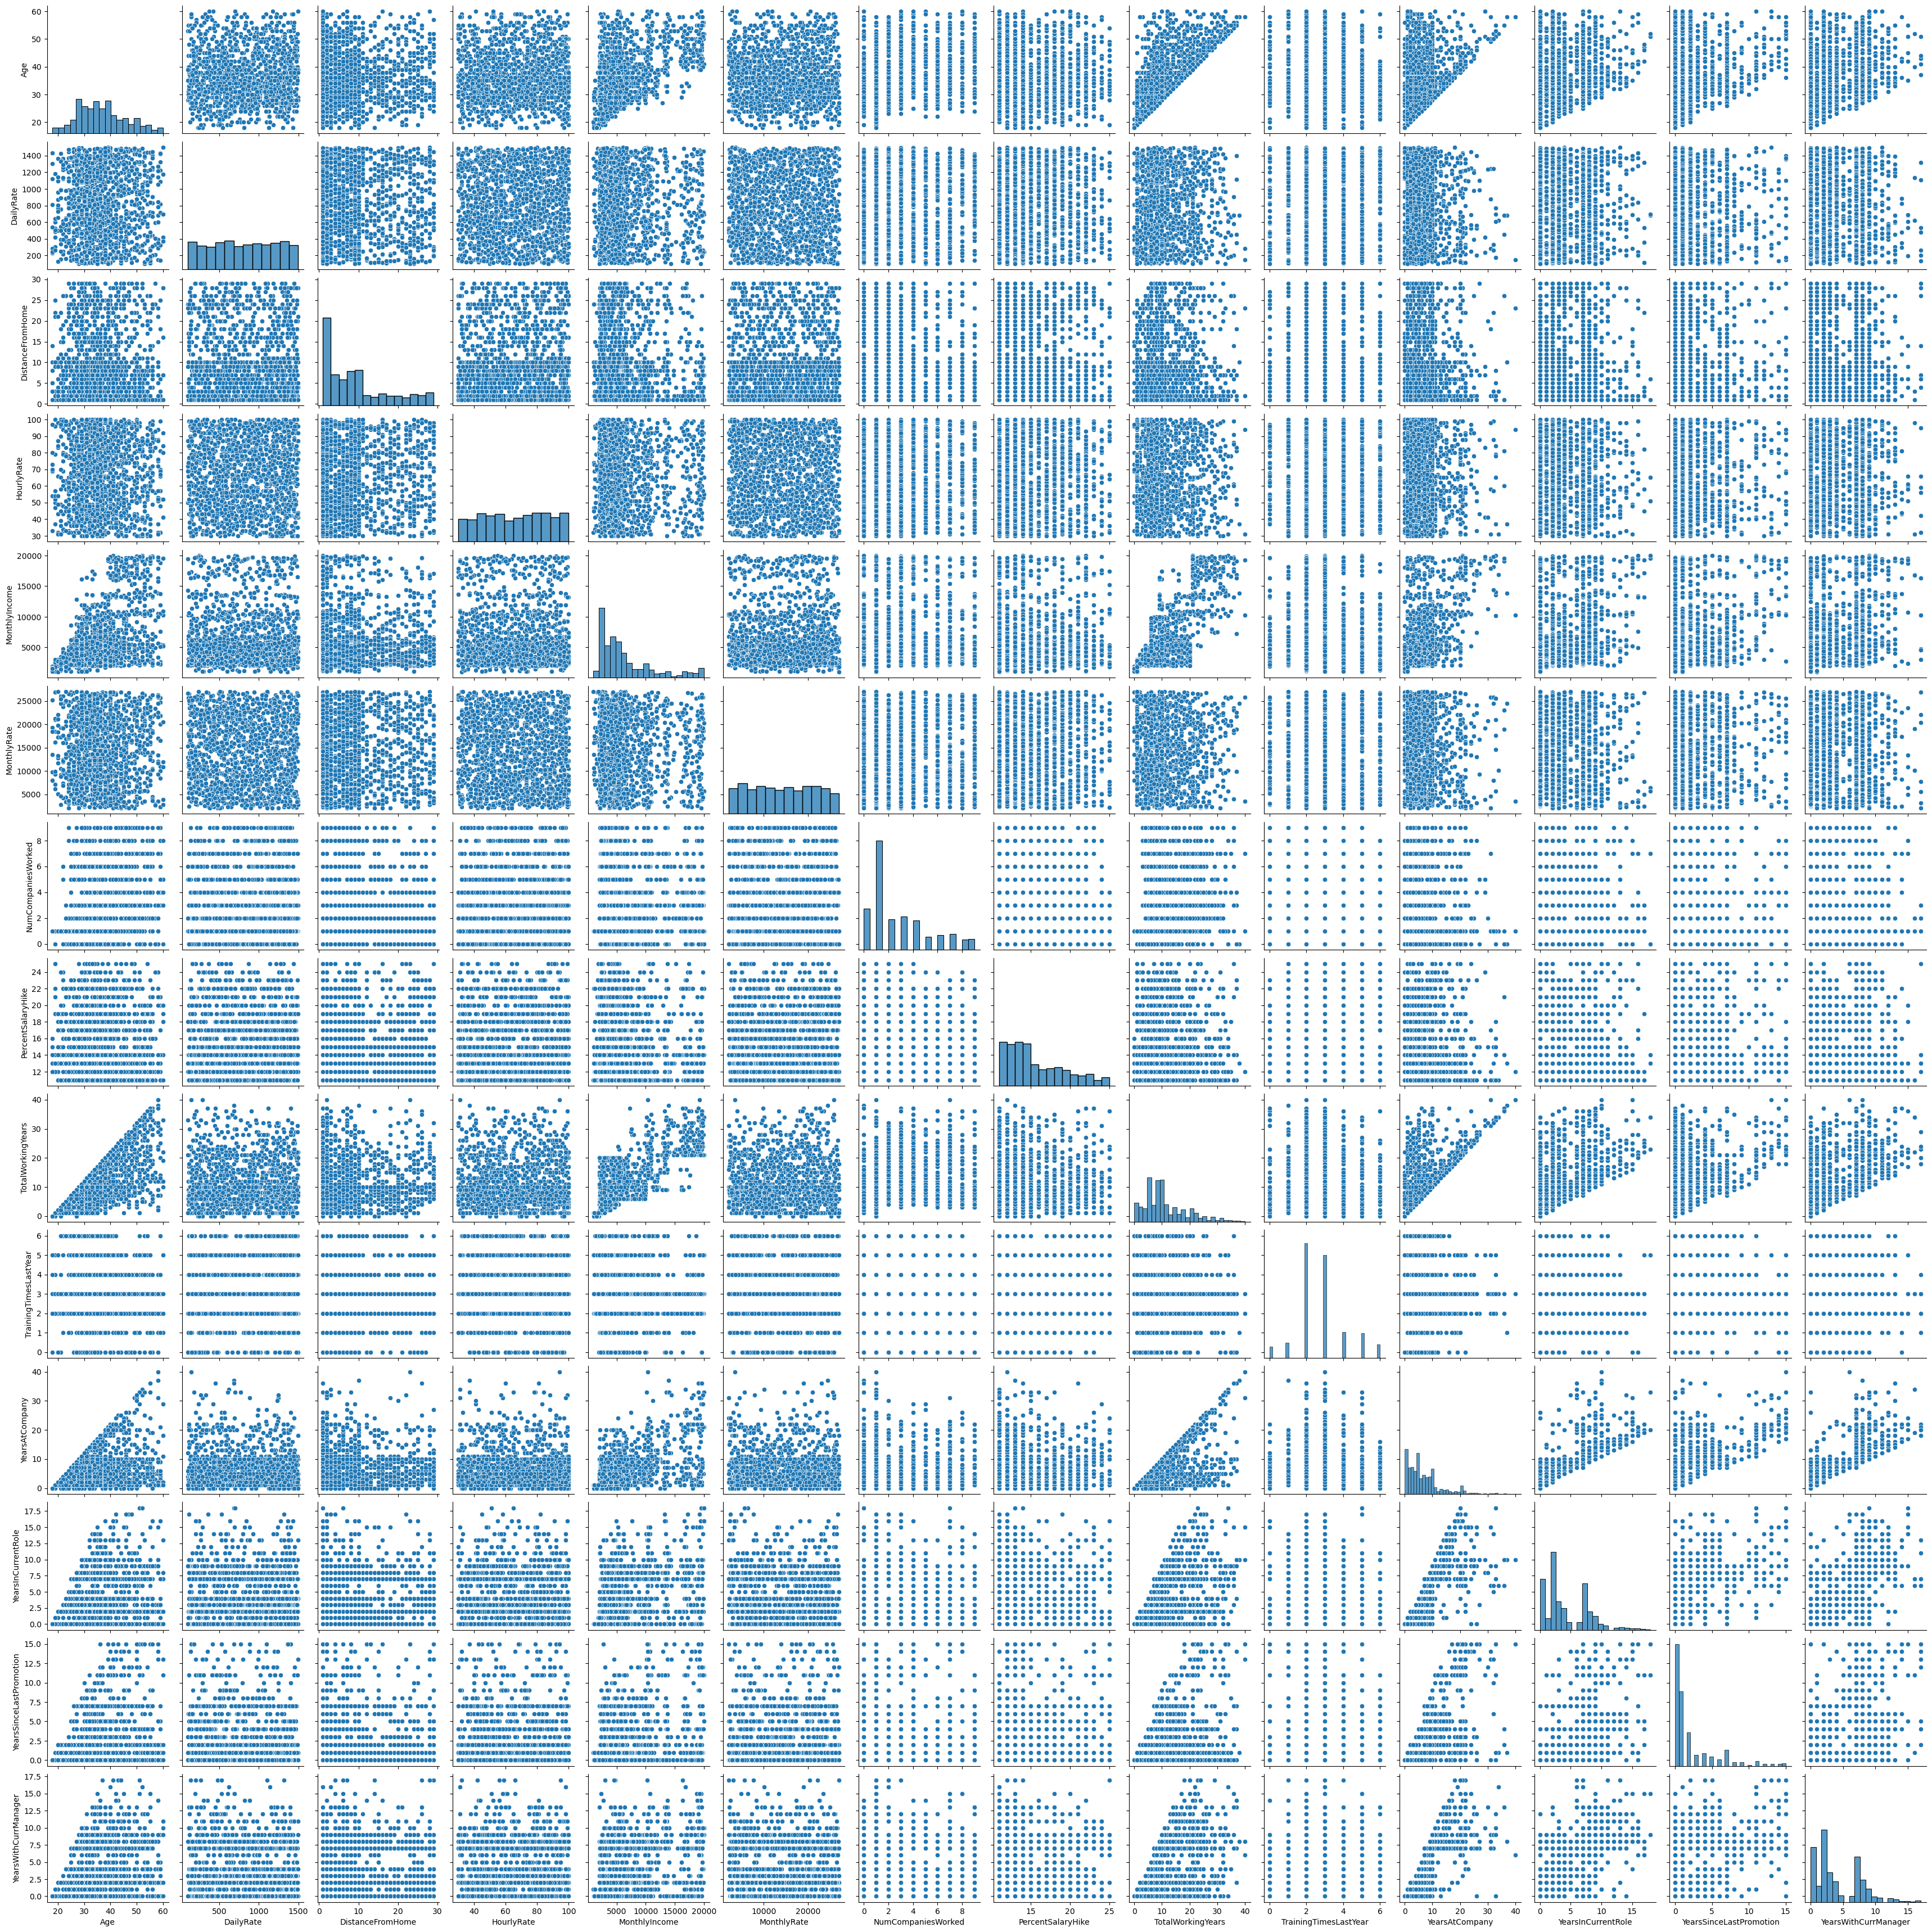

In [62]:
sns.pairplot(df[quantitative_columns])

<Axes: xlabel='Gender', ylabel='HourlyRate'>

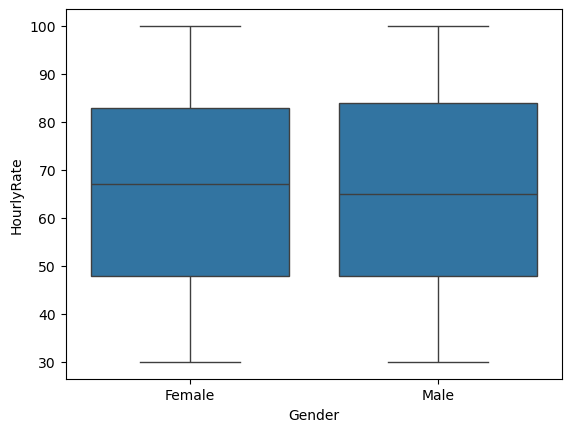

In [64]:
sns.boxplot(x='Gender', y='HourlyRate', data=df)

## Matriz de Covarianza

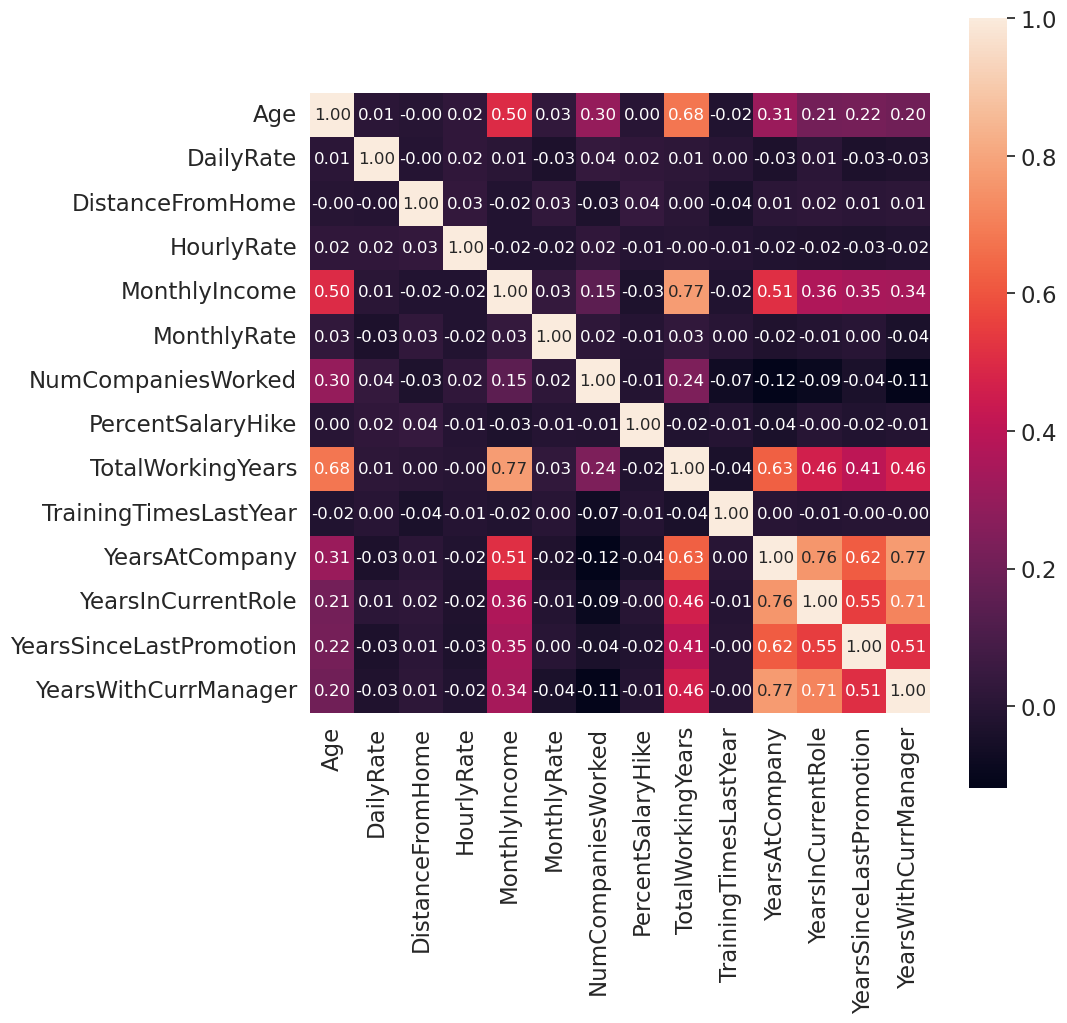

In [70]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(df[quantitative_columns])
convariance_matrix = np.cov(scaled.T)

plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(convariance_matrix, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12}, xticklabels=quantitative_columns, yticklabels=quantitative_columns)